Importing the prerequisite libraries
========

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # plotting library
from sklearn.model_selection import train_test_split  # ML Model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Loading & Viewing our dataset

In [17]:
calories_data = pd.read_csv("calories.csv")
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [18]:
exercise_data = pd.read_csv("exercise.csv")
print(exercise_data.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8


We can now move into the main part of our discussion, which is about analysing the data.

Firstly we'll combine the dataset. Moving the calories column to exercise.csv 


In [19]:
combined_data = pd.concat([exercise_data, calories_data['Calories']], axis=1)
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


We can observe an direct relationship between heart rate & body temperature with respect to the excercise the individual does.

In [20]:
#checking the number of rows & columns
combined_data.shape

(15000, 9)

We can infer that we have 15000 indivisual data.

i.e 15000 rows & 9 columns 

In [21]:
#getting the information about the data most importantly to know about any missing values
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Since there are no missing values our dataset seems perfect. 

We'll now drop off User_ID cloumn as it is unnecessary, it doesn't affect our input and target variables

Input Variables - Gender Age Height Duration Heart Rate Body Temp

Target Variables - Calories

Lets get some statistical insight on our data

In [22]:
combined_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Visualizing data with help of seaborn library to get any more useful insights
====


<Axes: xlabel='Gender', ylabel='count'>

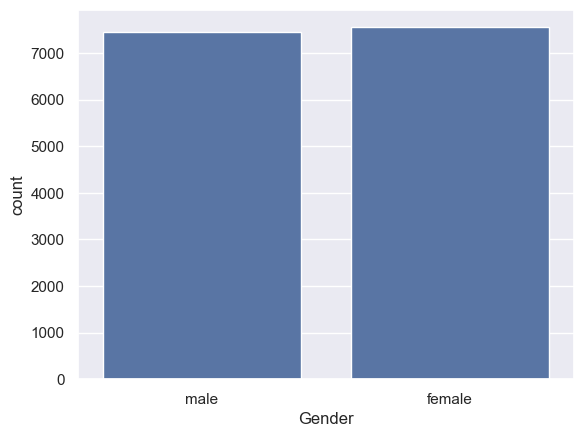

In [23]:
sns.set()
sns.countplot(x='Gender', data=combined_data)

C:\Users\abul4\AppData\Local\Temp\ipykernel_13436\2609749862.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

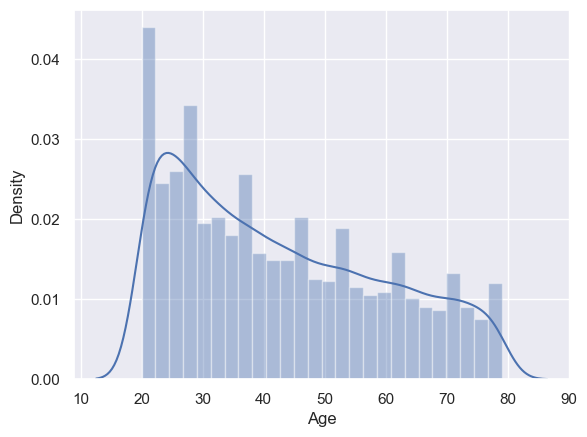

In [24]:
#Distribution of "Age" column
sns.distplot(combined_data['Age'])

C:\Users\abul4\AppData\Local\Temp\ipykernel_13436\3431655184.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

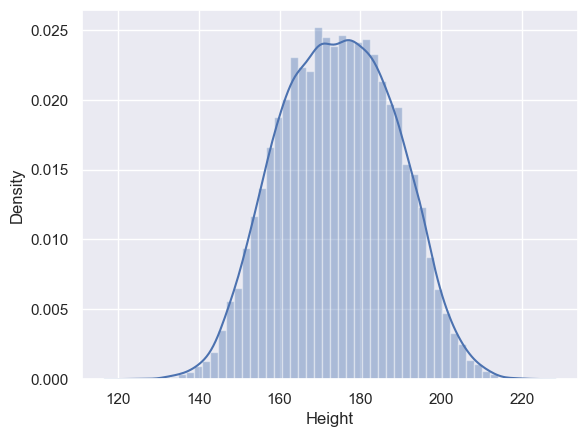

In [25]:
# finding the distribution of "Height" column
sns.distplot(combined_data['Height'])

C:\Users\abul4\AppData\Local\Temp\ipykernel_13436\1846692729.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

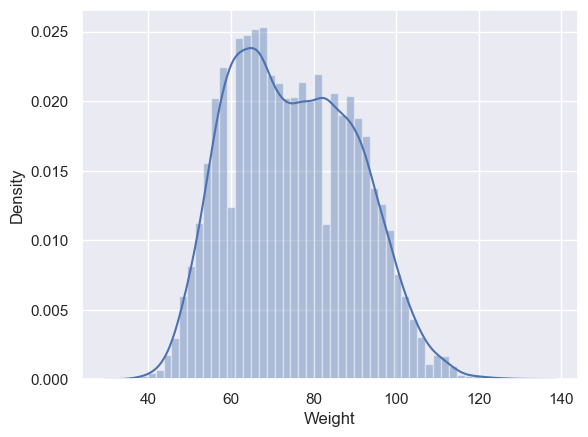

In [26]:
# distribution of weight column
sns.distplot(combined_data['Weight'])

C:\Users\abul4\AppData\Local\Temp\ipykernel_13436\390075107.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

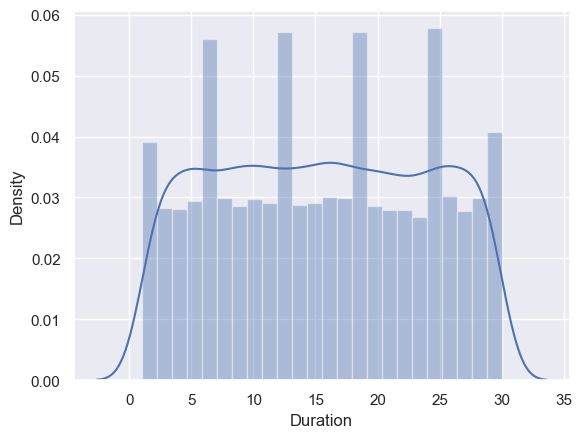

In [27]:
sns.distplot(combined_data['Duration'])

C:\Users\abul4\AppData\Local\Temp\ipykernel_13436\3932339865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

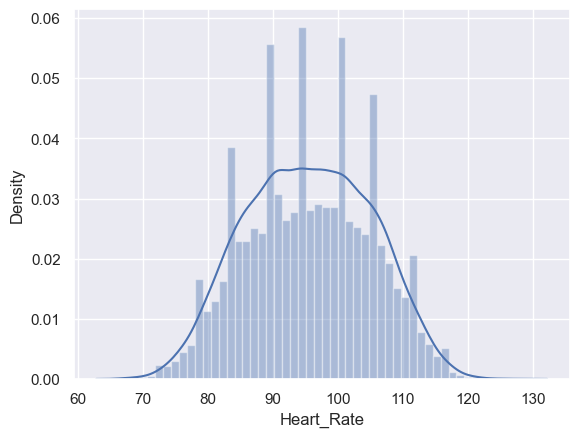

In [28]:
sns.distplot(combined_data['Heart_Rate'])

C:\Users\abul4\AppData\Local\Temp\ipykernel_13436\647738398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

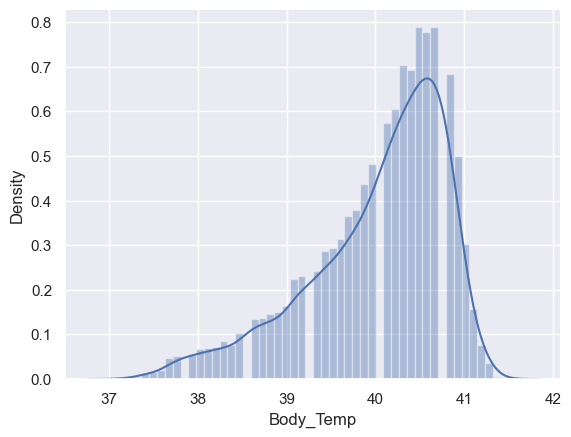

In [29]:
sns.distplot(combined_data['Body_Temp'])

Observations :
===



-> Data is evenly distributed(almost 7000) for both males and females.

->Age column has the mean value of 42 and the data is positively skewed & most of the datapoints are in between 20 to 50.

->Height data is normally distributed with mean of 174cm.

->Weight data is also normally distributed with mean of 74 kg

->Duration data is a low peaked data with mean of 15mins

->Heart rate column is normally distributed with mean of 95 heart beats with several outliers.
 
->Temperature column is negatively skewed with mean of 40.


Correlation
===



There mainly exists two type of correlation

-> Postive Correlation (Direct proportionality)

-> Negative Correlation (Indirect proportionality)

In [30]:
correlation = combined_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Red')

ValueError: could not convert string to float: 'male'

**As you can see we encounter an error.**

Its due to Gender being a catorigical value instead of numerical. Machine Learning can only be performed on numerical values so lets convert them into numerical data type

0 -> Male

1 -> Female

In [31]:
combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
combined_data.head()

C:\Users\abul4\AppData\Local\Temp\ipykernel_13436\2055377404.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

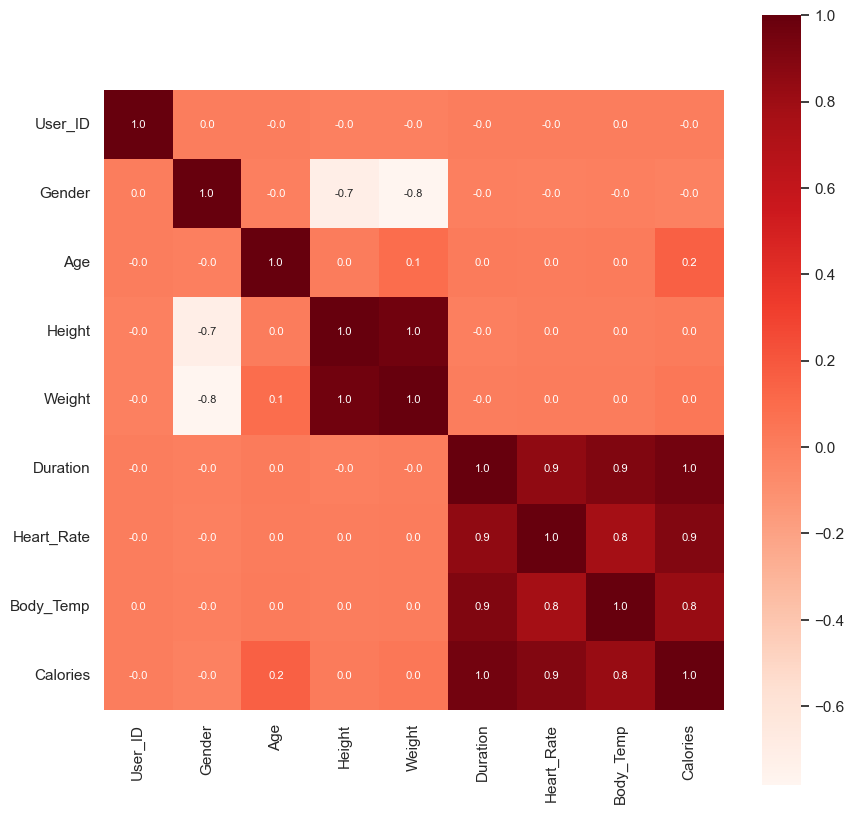

In [32]:
# Creating the heatmap again
correlation = combined_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

Inferences : 

Height & Gender, Weight & Gender are negatively correlated.

Heart rate , Body temp and calories are positively highly correlated.

Age and calories are weakly positively correlated.



Seperating our input vars/Features and Target variable.

In [33]:
X = combined_data.drop(columns=['User_ID','Calories'], axis=1)
Y = combined_data['Calories']

In [34]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [35]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

SPLIT THE DATA INTO TRAINING DATA & TEST DATA

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2) 
#test_size = 20% of total data so 80 % is training data.
print("Training Data Shape:")
print(X.shape,X_train.shape,X_test.shape)

Training Data Shape:
(15000, 7) (12000, 7) (3000, 7)


Inference: 

- X contains the orignal amount of data which is 15000
 
- X_train contains 80% of the data which is 12000
 
- X_test contains 20% of the data which is 3000

Similar values will be with Y.


MODEL IMPLEMENTATION : Linear Regression
===

In [37]:
#loading the model
model_1 = LinearRegression()

#training the model with X_train
model_1.fit(X_train, Y_train)

LinearRegression()

Model Evaluation
===

In [56]:
linear_prediction = model_1.predict(X_test)
print(linear_prediction)

[137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]


Test Metrics 
===

Mean Absolute Error


In [39]:
mae = metrics.mean_absolute_error(Y_test, linear_prediction)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  8.385188053147186


R-Squared Score


In [40]:
rss = metrics.r2_score(Y_test, linear_prediction)
print("R-Squared Score = ", rss)

R-Squared Score =  0.9668790377181355


Mean Squared Error

In [41]:
mse = metrics.mean_squared_error(Y_test, linear_prediction)
print("Mean Squared Error = ", mse)

Mean Squared Error =  130.08707386188382


Root Mean Squared Error

In [42]:
rmse = metrics.mean_squared_error(Y_test, linear_prediction, squared=False)
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  11.40557205325028


c:\Users\abul4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MODEL IMPLEMENTATION : Random Forest Regressor
====


In [43]:
# loading the model
model_2 = RandomForestRegressor()

# training the model with X_train
model_2.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation 
===

In [44]:
RF_prediction = model_2.predict(X_test)
print(RF_prediction)

[128.37 223.18  36.76 ... 145.26  23.91  89.78]


Test Metrics
===

Mean Abosolute Error

In [45]:
mae = metrics.mean_absolute_error(Y_test, RF_prediction)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.695606666666667


R-Squared Error

In [46]:
rss = metrics.r2_score(Y_test, RF_prediction)
print("R-Squared Score = ", rss)

R-Squared Score =  0.9981933212897512


Mean Squared Error

In [47]:
mse = metrics.mean_squared_error(Y_test, RF_prediction)
print("Mean Squared Error = ", mse)

Mean Squared Error =  7.0959758


Root Mean Squared Error

In [48]:
rmse = metrics.mean_squared_error(Y_test, RF_prediction, squared=False)
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  2.663827284190925


c:\Users\abul4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MODEL IMPLEMENTATION : XGBoost Regressor
===========

In [49]:
#loading the model
model_3 = XGBRegressor()
#training the model with X_train
model_3.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation 
===============================

In [50]:
XGB_prediction = model_3.predict(X_test)
print(XGB_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Test Metrics
===

Mean Absolute Error


In [51]:
MAE = metrics.mean_absolute_error(Y_test, XGB_prediction)
print("Mean Absolute Error = ",MAE)

Mean Absolute Error =  1.4833678883314132


R-Squared Score

In [52]:
rss = metrics.r2_score(Y_test,XGB_prediction )
print("R-Squared Score = ", rss)

R-Squared Score =  0.998800624504713


Mean Squared Error

In [53]:
mse = metrics.mean_squared_error(Y_test,XGB_prediction)
print("Mean Squared Error = ", mse)

Mean Squared Error =  4.710710012461346


Root Mean Squared Error

In [54]:
rmse = metrics.mean_squared_error(Y_test, XGB_prediction, squared=False)
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  2.1704170134933394


c:\Users\abul4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Overview of Model Metrics 
===
![Model Metrics](Untitled.jpg)

**We can conclude that XGB Regressor gives the best result**

Now lets work on making the model more user friendly and intractable.

In [74]:
gender = input("Enter your gender : ")
if gender.lower() == "male":
    gender = 0
elif gender.lower() == "female":
    gender = 1
age = int(input("Enter your age : "))
height = float(input("Enter your height : "))
weight = float(input("Enter your weight : "))
exercise_duration = float(input("Enter your exercise duration : "))
heart_rate = float(input("Enter your heart rate : "))
body_temp = float(input("Enter your body temperature : "))
# Create a NumPy array from the user input
user_input = np.array([[gender, age, height, weight, exercise_duration, heart_rate, body_temp]],dtype=np.float32)
XGB_prediction = model_3.predict(user_input)
print("Calories burnt : ",XGB_prediction)

[98.91186]


Building predictive models like the one implemented here using XGBoost offers valuable insights into understanding and forecasting complex relationships within datasets. By leveraging machine learning techniques, we can make informed decisions based on data-driven predictions, paving the way for enhanced decision-making and problem-solving in various domains.

This project serves as a testament to the power of data science in uncovering patterns, deriving insights, and driving actionable outcomes.



 Thank You
===